In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Ames_outliers_removed.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.drop("PID",axis=1,inplace=True)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

In [5]:
null_sort_df = df.isnull().sum().sort_values(ascending=False)
null_sort_df

Pool QC         2915
Misc Feature    2822
Alley           2729
Fence           2355
Mas Vnr Type    1775
                ... 
Heating QC         0
MS Zoning          0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 80, dtype: int64

In [6]:
(null_sort_df /len(df)) * 100

Pool QC         99.590024
Misc Feature    96.412709
Alley           93.235395
Fence           80.457807
Mas Vnr Type    60.642296
                  ...    
Heating QC       0.000000
MS Zoning        0.000000
1st Flr SF       0.000000
2nd Flr SF       0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [7]:
def percent_missing(df):
    p_nan = df.isnull().sum()/len(df) * 100
    p_nan = p_nan[p_nan > 0].sort_values(ascending=False)
    return p_nan
p_nan = percent_missing(df)
p_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
BsmtFin SF 1       0.034165
Garage Cars        0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
dtype: float64

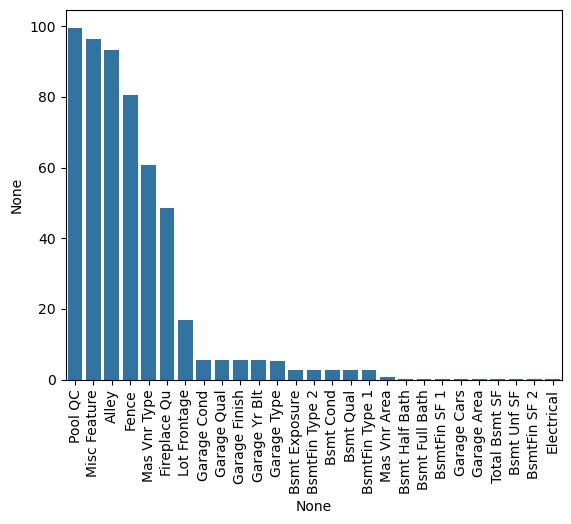

In [8]:
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [9]:
p_nan[p_nan < 1]

Mas Vnr Area      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
BsmtFin SF 1      0.034165
Garage Cars       0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
dtype: float64

In [10]:
df[df["Total Bsmt SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [11]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

數值型地下室欄位包括：

- BsmtFin SF 1：地下室完成面積 1
- BsmtFin SF 2：地下室完成面積 2
- Bsmt Unf SF：地下室未完成面積
- Total Bsmt SF：總地下室面積
- Bsmt Full Bath：地下室全浴室數量
- Bsmt Half Bath：地下室半浴室數量

In [13]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [14]:
p_nan = percent_missing(df)
p_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Yr Blt      5.432183
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Cond          2.733174
Bsmt Qual          2.733174
Mas Vnr Area       0.785787
Electrical         0.034165
Garage Cars        0.034165
Garage Area        0.034165
dtype: float64

In [15]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

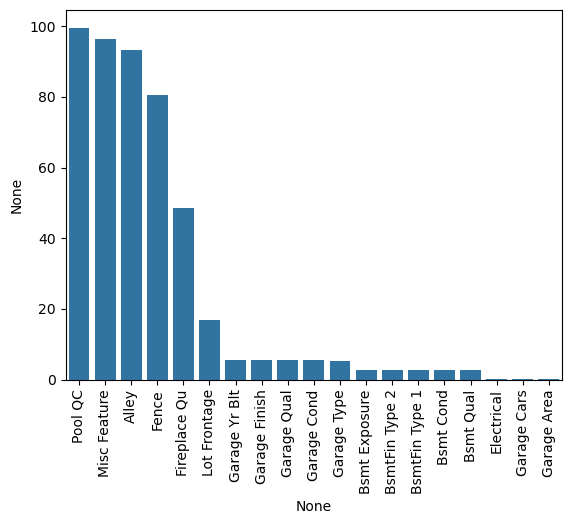

In [16]:
p_nan = percent_missing(df)
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [18]:
df[["Garage Type","Garage Finish","Garage Qual","Garage Cond"]]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [19]:
df[["Garage Yr Blt"]]

,Garage Yr Blt
0,1960.0
1,1961.0
2,1958.0
3,1968.0
4,1997.0
...,...
2922,1984.0
2923,1983.0
2924,NaN
2925,1975.0


In [20]:
gar_str_clos = ["Garage Type","Garage Finish","Garage Qual","Garage Cond"]
df[gar_str_clos] = df[gar_str_clos].fillna("None")

In [22]:
df[["Garage Yr Blt"]] = df[["Garage Yr Blt"]].fillna(0)

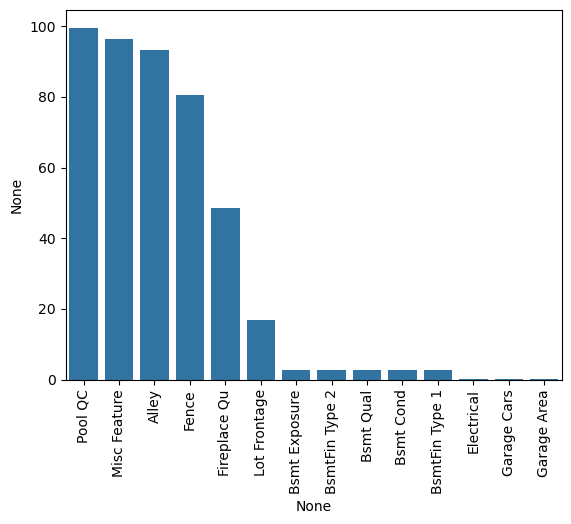

In [23]:
p_nan = percent_missing(df)
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [24]:
df.dropna(axis=0,subset=["Electrical","Garage Cars"],inplace=True)

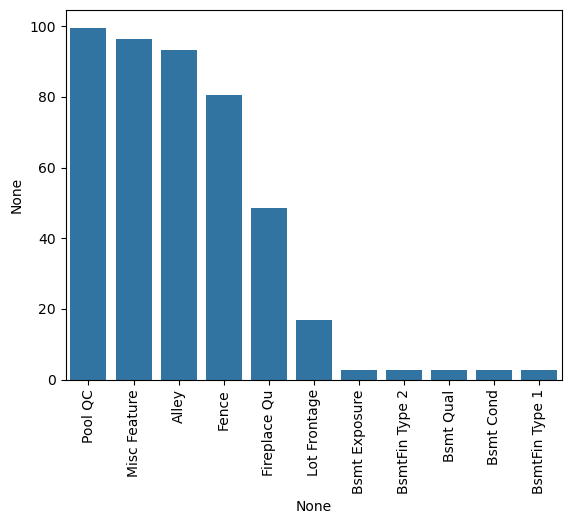

In [25]:
p_nan = percent_missing(df)
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [ ]:
bsmt_str_cols = ["Bsmt Qual","Bsmt Cond","Bsmt Exposure","BsmtFin Type 1","BsmtFin Type 2"]
df[bsmt_str_cols]

In [ ]:
df[bsmt_str_cols] = df[bsmt_str_cols].fillna("None")

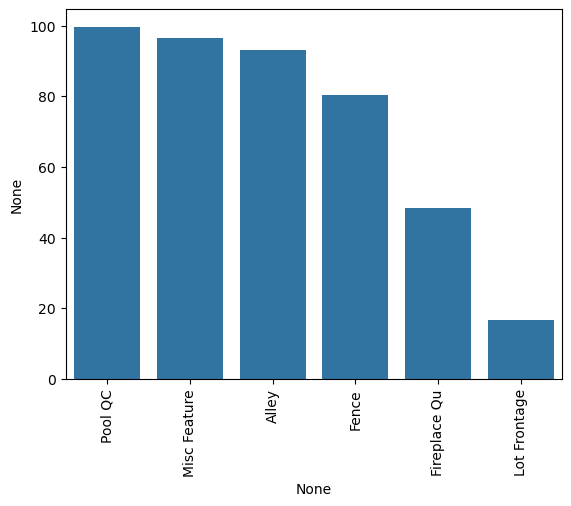

In [30]:
p_nan = percent_missing(df)
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [34]:
p_nan = percent_missing(df)
p_nan

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

In [35]:
df = df.drop(["Pool QC","Misc Feature","Alley","Fence"],axis=1)

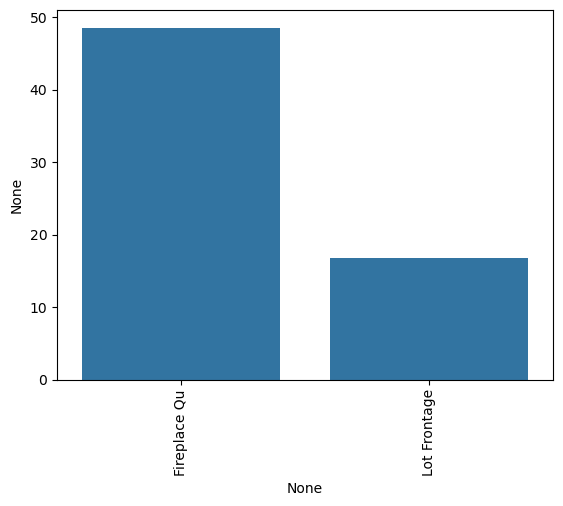

In [36]:
p_nan = percent_missing(df)
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [37]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

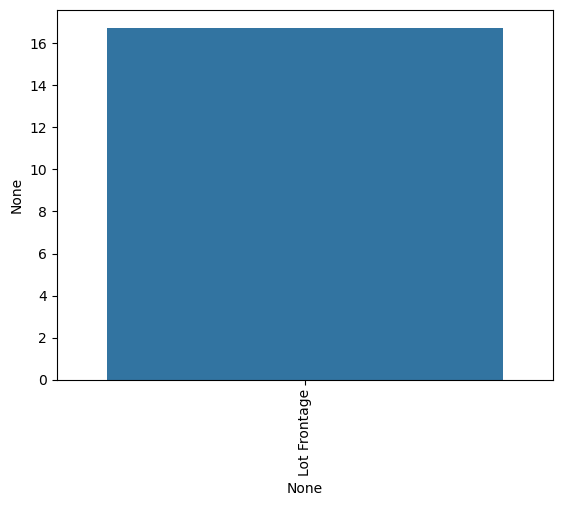

In [38]:
p_nan = percent_missing(df)
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

Lot Frontage  通常指的是房屋正面與街道的距離

這些名字代表的是阿姆斯市（Ames, Iowa）內的不同社區或鄰里。在房地產數據中，`Neighborhood` 指的是房產所在的地理位置，每個名稱代表一個特定的區域。這些不同的社區可能會有不同的房價、地段特性、居民組成以及生活設施等特點。

以下是一些具體的鄰里名稱和可能的簡介：

- **NAmes**: 通常是指 North Ames，可能是位於阿姆斯北部的一個住宅區。
- **Gilbert**: 可能是一個以家庭為主的社區。
- **StoneBr**: 簡稱 Stone Bridge，可能是一個較新的或高檔的住宅區。
- **NWAmes**: 指 Northwest Ames，指的是阿姆斯西北部的一個區域。
- **Somerst**: 可能指的是 Somerst 社區，這是一個受歡迎的住宅區。
- **BrDale**: 可能是 Brookdale 的縮寫，指的是一個特定的住宅區。
- **NPkVill**: North Park Village 的縮寫，可能是一個小型社區。
- **NridgHt**: Northridge Heights 的縮寫，通常是高檔住宅區。
- **Blmngtn**: Bloomington 的縮寫，可能是一個家庭型社區。
- **NoRidge**: North Ridge，一個可能擁有優越景觀的區域。
- **SawyerW**: Sawyer West，Sawyer 社區的一部分。
- **Sawyer**: 一個可能中等價位的住宅區。
- **Greens**: 可能是一個小型或專門的住宅區。
- **BrkSide**: Brookside，可能是一個歷史悠久的區域。
- **OldTown**: 老城區，通常是城市的老區域，有很多歷史建築。
- **IDOTRR**: Interstate Department of Transportation Railroad，可能是一個靠近鐵路的工業區。
- **ClearCr**: Clear Creek，一個可能靠近溪流的自然美景區。
- **SWISU**: South West Iowa State University，靠近愛荷華州立大學的西南部。
- **Edwards**: 可能是以開發者或地區歷史人物命名的社區。
- **CollgCr**: College Creek，可能是學生或大學教職工居住的區域。
- **Crawfor**: Crawford，可能是一個以家庭為主的社區。
- **Blueste**: Bluestem，可能是一個新開發的住宅區。
- **Mitchel**: 可能是一個家庭型社區。
- **Timber**: 可能是一個擁有豐富樹木的區域。
- **MeadowV**: Meadow Village，一個可能有開放空間的社區。
- **Veenker**: 可能是一個以高檔住宅為主的社區。
- **GrnHill**: Green Hill，可能是一個綠化很好的區域。
- **Landmrk**: Landmark area，一個可能具有地標性的區域。

這些社區的名稱有助於了解房產所處的位置和社區特色.

In [42]:
df["Neighborhood"].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [45]:
group = df.groupby("Neighborhood")["Lot Frontage"]
list(group)

[('Blmngtn',
  52      43.0
  53      43.0
  468     53.0
  469     51.0
  470     43.0
  471     43.0
  472     43.0
  473     43.0
  1080     NaN
  1081     NaN
  1082    43.0
  1083    43.0
  1084    53.0
  1740    53.0
  1741    53.0
  1742     NaN
  1743    53.0
  2416    43.0
  2417     NaN
  2418     NaN
  2419     NaN
  2420     NaN
  2421     NaN
  2422    43.0
  2423    43.0
  2424    43.0
  2425    53.0
  2426    53.0
  Name: Lot Frontage, dtype: float64),
 ('Blueste',
  298     35.0
  299     35.0
  932     24.0
  933     24.0
  934     24.0
  935     24.0
  1541    24.0
  1542    24.0
  2222    24.0
  2224    35.0
  Name: Lot Frontage, dtype: float64),
 ('BrDale',
  29      21.0
  30      21.0
  31      21.0
  402     21.0
  403     24.0
  404     21.0
  405     21.0
  406     21.0
  407     21.0
  1039    21.0
  1040    21.0
  1041    21.0
  1042    21.0
  1043    21.0
  1044    21.0
  1045    21.0
  1674    21.0
  1675    21.0
  1676    21.0
  1677    24.0
  1678    24.0

In [46]:
group.mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [47]:
df[df["Lot Frontage"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [48]:
df["Lot Frontage"] = group.transform(lambda val: val.fillna(val.mean()))

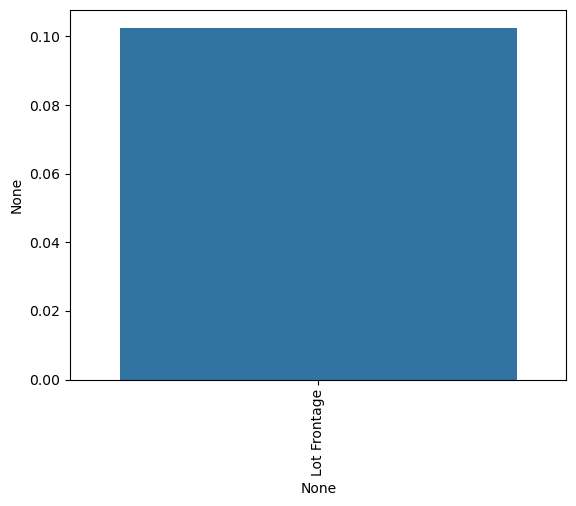

In [50]:
p_nan   = percent_missing(df)
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [51]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

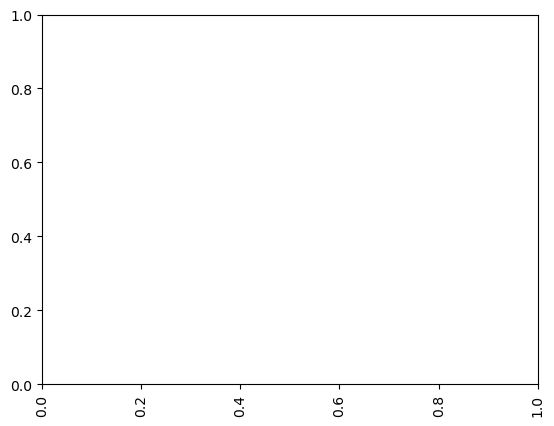

In [52]:
p_nan = percent_missing(df)
sns.barplot(x = p_nan.index,y = p_nan)  
plt.xticks(rotation=90) 
plt.show()

### 為什麼需要 OneHotEncoder

1. **轉換類別變數**：
   - 類別變數不能直接用於大多數機器學習模型，需要將其轉換為數值型。
   - OneHotEncoder 將每個類別變數轉換為多個二進位變數，使模型能夠理解並利用這些特徵。

2. **避免引入順序關係**：
   - 將類別變數轉換為數字（如使用 LabelEncoder）可能會引入不必要的順序關係，而 OneHotEncoder 避免了這一點。
   - 保證了每個類別之間的獨立性，不會因為數值大小而影響模型的預測。

3. **提高模型性能**：
   - 對於很多模型來說，使用 OneHotEncoder 編碼後的特徵可以提高模型的性能，因為它能更好地表示數據的結構和模式。

原始資料如下:


### 原始資料

|    | Color |
|----|-------|
| 0  | Red   |
| 1  | Green |
| 2  | Blue  |
| 3  | Green |
| 4  | Red   |

### 把顏色對應到數字(LabelEncoder) 結果

|    | Color | Color_Label |
|----|-------|-------------|
| 0  | Red   | 2           |
| 1  | Green | 1           |
| 2  | Blue  | 0           |
| 3  | Green | 1           |
| 4  | Red   | 2           |

### OneHotEncoder 結果

|    | Color | Color_Red | Color_Green | Color_Blue |
|----|-------|-----------|-------------|------------|
| 0  | Red   | 1         | 0           | 0          |
| 1  | Green | 0         | 1           | 0          |
| 2  | Blue  | 0         | 0           | 1          |
| 3  | Green | 0         | 1           | 0          |
| 4  | Red   | 1         | 0           | 0          |

## LabelEncoder 

#### 將類別標籤轉換為數字編碼，適用於有順序關係的類別變數。

In [54]:
import pandas as pd

# 建立資料框
data = pd.DataFrame({
    'Fruits': ['Apple', 'Banana', 'Cherry', 'Kewi'],
})
fruit_mappin = {"Apple":1,"Banana":2,"Cherry":3,"Kewi":4}
data["Fruit_number1"] = data["Fruits"].map(fruit_mappin)
data["Fruit_number2"] = data["Fruits"].apply(lambda x : fruit_mappin[x])
print(data)

   Fruits  Fruit_number1  Fruit_number2
0   Apple              1              1
1  Banana              2              2
2  Cherry              3              3
3    Kewi              4              4


In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# 建立資料框
data = pd.DataFrame({
    'Fruits': ['Apple', 'Banana', 'Cherry', 'Kewi','Cherry', 'Kewi','Apple', 'Banana'],
})
le = LabelEncoder()
le.fit(data["Fruits"])
data["Fruit_number"] = le.transform(data["Fruits"])
data

,Fruits,Fruit_number
0,Apple,0
1,Banana,1
2,Cherry,2
3,Kewi,3
4,Cherry,2
5,Kewi,3
6,Apple,0
7,Banana,1


In [60]:
## OneHotEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [72]:
# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})

In [73]:
ohe = OneHotEncoder()
on_hot_code = ohe.fit_transform(data[['Color']])
print(on_hot_code)

  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 2)	1.0


In [74]:
ohe = OneHotEncoder(sparse_output=False)
on_hot_code = ohe.fit_transform(data[['Color']])
print(on_hot_code)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [68]:
colName = ohe.get_feature_names_out()
print(colName)
one_hot_df = pd.DataFrame(on_hot_code,columns=colName)
one_hot_df

['Color_Blue' 'Color_Green' 'Color_Red']


,Color_Blue,Color_Green,Color_Red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [69]:
colname = ohe.get_feature_names_out()
print(colname)
on_hot_df = pd.DataFrame(on_hot_code,columns=colname)
on_hot_df

['Color_Blue' 'Color_Green' 'Color_Red']


,Color_Blue,Color_Green,Color_Red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [75]:
data = data.join(on_hot_df)
data

,Color,Color_Blue,Color_Green,Color_Red
0,Red,0.0,0.0,1.0
1,Green,0.0,1.0,0.0
2,Blue,1.0,0.0,0.0
3,Green,0.0,1.0,0.0
4,Red,0.0,0.0,1.0


In [77]:
import pandas as pd
# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})
one_hot_df = pd.get_dummies(data,columns=["Color"])
print(one_hot_df)
one_hot_df_int = one_hot_df.astype(int)
print(one_hot_df_int)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True
   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           0            1          0
2           1            0          0
3           0            1          0
4           0            0          1


在數據分析和機器學習中，數據類型可以大致分為以下幾種，每種都有其特定的用途和處理方式：

1. **類別數據（Categorical Data）**
   - **說明**：表示不同類別或群組的數據，通常是非數值的。
   - **案例**：性別（男、女）、血型（A、B、AB、O）、產品類型（家具、電子產品、服裝）。

2. **數值數據（Numerical Data）**
   - 分為兩種：
     - **連續數據（Continuous Data）**
       - **說明**：可以在一定範圍內任意細分的數據。
       - **案例**：身高、體重、溫度、股票價格。
     - **離散數據（Discrete Data）**
       - **說明**：具體的整數值，不可以細分。
       - **案例**：班上學生人數、公司員工數、一天中的客戶服務電話次數。

3. **時間數據（Time Series Data）**
   - **說明**：按時間順序排列的數據點序列，通常每個數據點都有一個時間戳。
   - **案例**：每日股市收盤價、每小時天氣記錄、月銷售數據。

4. **文字數據（Text Data）**
   - **說明**：由字、詞、句子構成的數據，通常需要特殊的處理方式如自然語言處理（NLP）。
   - **案例**：商品評論、新聞文章、社交媒體帖子。

5. **布爾數據（Boolean Data）**
   - **說明**：表示是或否的二元數據。
   - **案例**：是否已婚（是、否）、是否訂閱電子報（是、否）。

6. **序列數據（Ordinal Data）**
   - **說明**：類別數據的一種，但類別之間存在自然排序或等級。
   - **案例**：滿意度調查（不滿意、一般、滿意、非常滿意）、教育程度（小學、中學、大學、研究生）。

這些數據類型在數據分析和機器學習中扮演著關鍵角色，根據數據的特性選擇適當的處理方式對於獲得有效的分析結果至關重要。

In [78]:
import pandas as pd
df = pd.read_csv("./Ames_NO_Missing_Data.csv")
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

當我們將類別數據以數字形式編碼時需要小心。我們需要確保數字之間的關係對模型來說是有意義的。例如，MSSubClass 的編碼本質上只是每個類別的數字代碼：

**MSSubClass: 住宅類型。**

- **20**	1-STOREY 1946 & NEWER ALL STYLES 一層樓 1946年及以後所有風格
- **30**	1-STOREY 1945 & OLDER 一層樓 1945年及更早
- **40**	1-STOREY W/FINISHED ATTIC ALL AGES 一層樓帶完成的閣樓 所有年齡
- **45**	1-1/2 STORY - UNFINISHED ALL AGES 一層半未完成 所有年齡
- **50**	1-1/2 STORY FINISHED ALL AGES 一層半完成 所有年齡
- **60**	2-STORY 1946 & NEWER 二層樓 1946年及以後
- **70**	2-STORY 1945 & OLDER 二層樓 1945年及更早
- **75**	2-1/2 STORY ALL AGES 二層半 所有年齡
- **80**	SPLIT OR MULTI-LEVEL 分割或多層
- **85**	SPLIT FOYER 分割門廳
- **90**	DUPLEX - ALL STYLES AND AGES 雙拼 - 所有風格和年齡
- **120**	1-STORY PUD (Planned Unit Development) - 1946 & NEWER 一層樓PUD（計劃單元開發）- 1946年及以後
- **150**	1-1/2 STORY PUD - ALL AGES 一層半PUD - 所有年齡
- **160**	2-STORY PUD - 1946 & NEWER 二層樓PUD - 1946年及以後
- **180**	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER PUD - 多層 - 包括分割層/門廳
- **190**	2 FAMILY CONVERSION - ALL STYLES AND AGES 兩家庭改造 - 所有風格和年齡

數字本身似乎並無與其他數字相關。雖然 30 > 20 是對的，但“1-STOREY 1945 & OLDER” > “1-STOREY 1946 & NEWER ALL STYLES”實際上並無意義。需要注意的是，這並不總是這樣，例如將頭等艙和二等艙編碼為 1 和 2 的情況。確保你完全理解你的數據集，以檢查需要轉換/更改的內容。

In [80]:
df["MS SubClass"] = df["MS SubClass"].astype(str)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   object 
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

In [82]:
df_nums = df.select_dtypes(exclude=["object"])#排除物件類型
df_objs = df.select_dtypes(include=["object"])#只保物件類型
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [83]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    1152 non-null   object
 18  Exter Qu

In [90]:
df_objs = pd.get_dummies(df_objs,drop_first=True)
df_objs = df_objs.astype(int)
df_objs

,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2921,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2923,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## 共線(Collinearity)

In [88]:
import pandas as pd
# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})

one_hot_df =  pd.get_dummies(data,columns=["Color"],drop_first=True)
one_hot_df = one_hot_df.astype(int)
one_hot_df

,Color_Green,Color_Red
0,0,1
1,1,0
2,0,0
3,1,0
4,0,1


In [91]:
fial_df = df_nums.join(df_objs)
fial_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,1,0,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,1,0,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,1,0,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,1,0,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,1,0,0,0,0,1,0
